# Refactor dgym library designer

Import data.

In [1]:
%load_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
print('load data')
path = '../../dgym-data'

deck = dg.MoleculeCollection.from_sdf(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

load data


In [ ]:
building_blocks = dg.datasets.enamine(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630.fpb')

# align fingerprints to building blocks
print('align fingerprints')
fingerprints = dg.utils.sort_fingerprints(fingerprints, building_blocks)

# partition building blocks according to functional groups
print('partition building blocks')
templates = dg.utils.get_unique_reactants(reactions)
building_blocks = dg.utils.partition_building_blocks(building_blocks, templates, out_dir=path)

align fingerprints
partition building blocks


In [ ]:
from dgym.envs.library_designer import LibraryDesigner
from dgym.envs.oracle import DGLOracle

library_designer = LibraryDesigner(
    reactions,
    building_blocks,
    fingerprints
)

lipo_oracle = DGLOracle('GCN_canonical_Lipophilicity')
esol_oracle = DGLOracle('GCN_canonical_ESOL')

In [69]:
from collections import Counter

original_inspirations = []
for mol in drug_env.library:
    while mol.inspiration:
        mol = mol.inspiration
    original_inspirations.append(mol)
    
Counter([o.mol for o in original_inspirations]).most_common(20)

[(<rdkit.Chem.rdchem.Mol at 0x7fe409f69bd0>, 2495),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a196a40>, 187),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1d1540>, 156),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a140200>, 145),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1fa490>, 96),
 (<rdkit.Chem.rdchem.Mol at 0x7fe428ffbe60>, 83),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1614d0>, 81),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a160cf0>, 77),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a10bed0>, 62),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1433e0>, 50),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1d26c0>, 50),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1f9070>, 49),
 (<rdkit.Chem.rdchem.Mol at 0x7fe409f690e0>, 47),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a162180>, 45),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a195f50>, 45),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1b6a40>, 45),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1f8430>, 45),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1d0040>, 43),
 (<rdkit.Chem.rdchem.Mol at 0x7fe40a1082e0>, 39),
 (<rdkit.Chem.rdchem.Mol at 0x7fe42ad5c6d0>, 

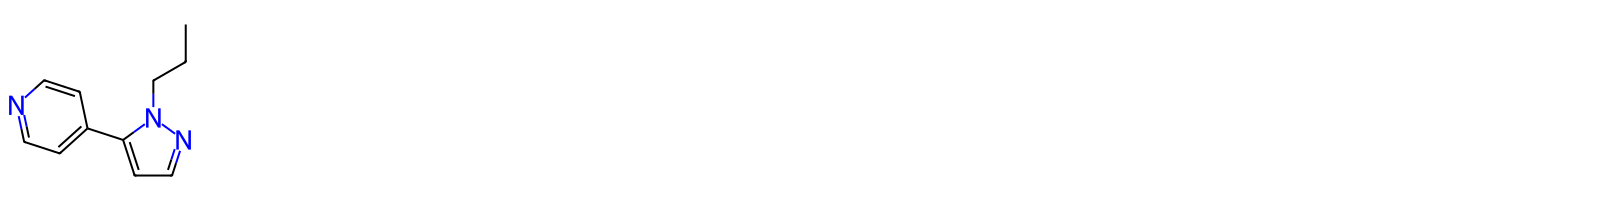

In [130]:
from rdkit.Chem import Draw

mol = drug_env.library[4]

lineage = [mol]
results = []
while mol.inspiration:
    mol = mol.inspiration
    lineage.append(mol)
    try:
        results.append(
            utility_function(
                mol.annotations['GCN_canonical_Lipophilicity'],
                mol.annotations['GCN_canonical_ESOL']
            )
        )
    except:
        pass

display(*results[::-1])
display(Draw.MolsToGridImage(
    [m.mol for m in lineage][::-1],
    molsPerRow=8,
    maxMols=10_000
))